#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
rows, columns = df.shape

print(f'Number of rows= {rows}\nNumber of columns= {columns}')

Number of rows= 148654
Number of columns= 13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [5]:
for col in df.columns:
    print(f'{col} data type is: {df[col].dtype}')

Id data type is: int64
EmployeeName data type is: object
JobTitle data type is: object
BasePay data type is: float64
OvertimePay data type is: float64
OtherPay data type is: float64
Benefits data type is: float64
TotalPay data type is: float64
TotalPayBenefits data type is: float64
Year data type is: int64
Notes data type is: float64
Agency data type is: object
Status data type is: float64


In [6]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

### Dropping Status and Notes as they are Null valued columns.

In [7]:
df.drop(['Status', 'Notes'], axis=1, inplace= True)

In [8]:
df.sample(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
97654,97655,Xue X Mai,Custodian,55026.02,249.58,24.00,24547.72,55299.60,79847.32,2013,San Francisco
40802,40803,Dennis Kelly,Firefighter,109783.84,10891.40,15099.20,37595.45,135774.44,173369.89,2012,San Francisco
8125,8126,GEORGE COTHRAN,MANAGER I,106506.22,0.00,0.00,NaN,106506.22,106506.22,2011,San Francisco
43293,43294,Alan Davison,Senior Housing Inspector,113646.06,0.00,0.00,42690.15,113646.06,156336.21,2012,San Francisco
81127,81128,James M McKinney,Plumber,102161.50,7592.87,5146.48,36594.68,114900.85,151495.53,2013,San Francisco
146015,146016,Steven T Tran,Transit Operator,2270.77,738.00,0.00,1472.53,3008.77,4481.30,2014,San Francisco
7013,7014,RITA RESTREPO,REGISTERED NURSE,104395.50,2271.06,6634.59,NaN,113301.15,113301.15,2011,San Francisco
70161,70162,Andrea Pierce,IS Project Director,0.00,0.00,5521.42,422.39,5521.42,5943.81,2012,San Francisco
127581,127582,Monica L Glover,HSA Sr Eligibility Worker,74587.06,2274.80,624.00,30300.29,77485.86,107786.15,2014,San Francisco
144590,144591,Stephanie M Wehrman,Special Nurse,5945.25,0.00,990.88,1534.54,6936.13,8470.67,2014,San Francisco


In [9]:
df[(df['TotalPayBenefits'] == df['TotalPay']) & (df['Benefits'].isna())].shape, df[df['Benefits'].isna()].shape

((36163, 11), (36163, 11))

### We can see that TotalPay and TotalPayBenefits are the same whenever Benifits is 0 or NaN
- we can fill Benefits missing values with 0.

In [10]:
df.fillna({'Benefits': 0.00}, inplace= True)

In [11]:
df.sample(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
22324,22325,EDNA ARTERBERRY,HUMAN SERVICES TECHNICIAN,56085.57,0.00,624.00,0.00,56709.57,56709.57,2011,San Francisco
106295,106296,Chethana G Shambulinge Gowda,PS Aide to Prof,8934.00,0.00,0.00,89.34,8934.00,9023.34,2013,San Francisco
28885,28886,RICHARD FIELDS,CIVIL ENGINEERING ASSISTANT,23162.70,0.00,0.00,0.00,23162.70,23162.70,2011,San Francisco
134200,134201,Ester G Nino,Health Care Billing Clerk 2,59463.79,0.00,0.00,24931.09,59463.79,84394.88,2014,San Francisco
35529,35530,GEORGE LAU,"BOARD/COMMISSION MEMBER, GROUP V",782.00,0.00,0.00,0.00,782.00,782.00,2011,San Francisco
31404,31405,KATHERINE WALLACE,RECREATION LEADER,10600.60,0.00,12.15,0.00,10612.75,10612.75,2011,San Francisco
92274,92275,Martha Melara-Cuellar,Program Specialist,72822.75,0.00,687.45,26433.90,73510.20,99944.10,2013,San Francisco
54435,54436,Julio Perez,Water Meter Repairer,70482.00,207.30,0.00,31419.04,70689.30,102108.34,2012,San Francisco
120832,120833,Monico Corral,"Property Manager, Port",101954.01,0.00,0.00,36144.65,101954.01,138098.66,2014,San Francisco
48855,48856,Chi Keong Iao,Assoc Engineer,84875.00,2331.82,0.00,36572.81,87206.82,123779.63,2012,San Francisco


In [12]:
df[df['OvertimePay'].isna() | df['OtherPay'].isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,San Francisco


- OvertimePay and OtherPay are missing for employees who probably left the company or refused to provide their information.
- We can drop these rows since they dont impact our dataset in any means.

In [13]:
df.dropna(subset=['OvertimePay', 'OtherPay'], inplace= True)

In [14]:
df.isna().sum()

Id                    0
EmployeeName          0
JobTitle              0
BasePay             605
OvertimePay           0
OtherPay              0
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
Agency                0
dtype: int64

In [15]:
df.sample(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
93209,93210,Richard D Fields,Engineering Assistant,67410.54,1128.44,0.00,27259.27,68538.98,95798.25,2013,San Francisco
65814,65815,Estela Burns,Special Nurse,19416.00,0.00,3236.00,5410.27,22652.00,28062.27,2012,San Francisco
91360,91361,Dayana L Salazar,Surgical Procedures Technician,65311.94,8891.71,2468.27,26593.93,76671.92,103265.85,2013,San Francisco
80525,80526,Jianmin Ma,"Sr. Stationary Eng, Sew Plant",108049.45,2922.10,8131.93,36743.55,119103.48,155847.03,2013,San Francisco
146724,146725,Yu Bi Chen,Public Service Trainee,2862.21,0.00,0.00,28.61,2862.21,2890.82,2014,San Francisco


- we can see that BasePay is TotalPay - (OtherPay + OvertimePay)
- we can fill null values of BasePay with a mathematical formula (TotalPay - (OtherPay + OvertimePay))

In [16]:
df.loc[:, 'BasePay'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
148645    False
148647    False
148648    False
148649    False
148653    False
Name: BasePay, Length: 148650, dtype: bool

In [17]:
df.fillna({'BasePay': df['TotalPay'] - (df['OtherPay'] + df['OvertimePay'])}, inplace= True)

In [18]:
df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

- now that we have filled all the missing values we can do statistical operations, Data Visualization ...etc on various columns.

In [19]:
stat_cols = ['BasePay', 'TotalPay', 'TotalPayBenefits']

for col in df[stat_cols]:
    print(f'Column: {col}')
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()}")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"Range of Salaries: {df[col].max() - df[col].min()}")
    print(f"Standard deviation: {df[col].std()}")
    print('------------------')

Column: BasePay
Mean: 66055.50671772621
Median: 64862.31
Mode: 0    0.0
Name: BasePay, dtype: float64
Min: -166.01
Max: 319275.01
Range of Salaries: 319441.02
Standard deviation: 42885.91933390479
------------------
Column: TotalPay
Mean: 74770.33390097546
Median: 71427.23999999999
Mode: 0    0.0
Name: TotalPay, dtype: float64
Min: -618.13
Max: 567595.43
Range of Salaries: 568213.56
Standard deviation: 50516.19600864483
------------------
Column: TotalPayBenefits
Mean: 93695.07596912209
Median: 92406.01999999999
Mode: 0    7959.18
Name: TotalPayBenefits, dtype: float64
Min: -618.13
Max: 567595.43
Range of Salaries: 568213.56
Standard deviation: 62792.49739119337
------------------


### In the case of Negative valued salary, we can round it up to zero or leave it as is. Depending of the Factors and Context of the required analysis.
### In case of Zero valued salary, we can remove it or keep it as is. Depending of the Factors and Context of the required analysis.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

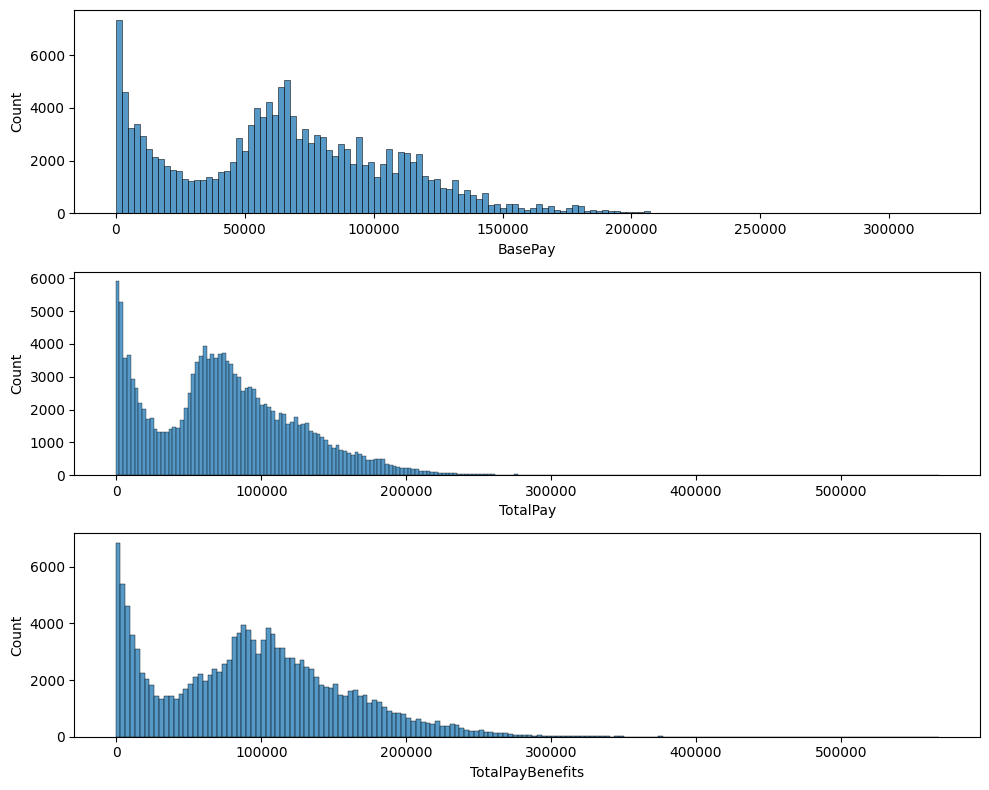

In [21]:
plt.figure(figsize=(10, 8))
plt.subplot(3,1,1)
sns.histplot(data= df, x='BasePay')
plt.subplot(3,1,2)
sns.histplot(data= df, x='TotalPay')
plt.subplot(3,1,3)
sns.histplot(data= df, x='TotalPayBenefits')
plt.tight_layout()

We can extract department names from jobtitle (if it was provided) by using string manipulation.
- The commented part was removed because it brought alof of unrelated department substrings.

In [22]:
def extract_department(job_title):
    if "(" in job_title and ")" in job_title:
        start_index = job_title.find("(") + 1
        end_index = job_title.find(")")
        department_name = job_title[start_index:end_index]
        return department_name
    # NOTE: This was removed since it brought alof of unrelated department substrings.
    # elif "," in job_title:
    #     parts = job_title.split(",")
    #     if len(parts) > 1:
    #         return parts[1]
    # elif "-" in job_title:
    #     parts = job_title.split("-")
    #     if len(parts) > 1:
    #         return parts[1]
    return None

In [23]:
df['Departments'] = df['JobTitle'].apply(extract_department)

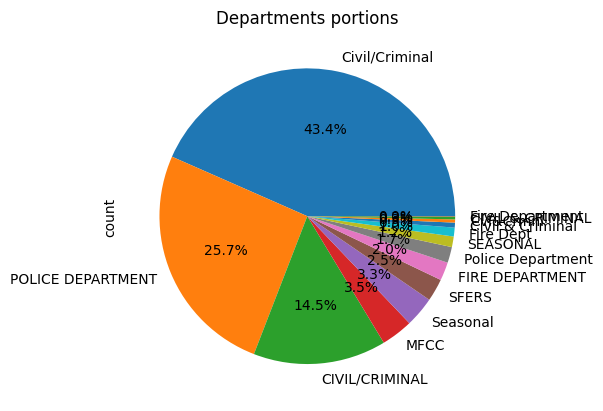

In [24]:
plt.title('Departments portions')
df['Departments'].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.show()

alot of rows weren't provided with a Department name in the JobTitle string. Neither a specific pattern to act on.

In [25]:
jtbp_gb = df.groupby('Year')['BasePay']
jttp_gb = df.groupby('Year')['TotalPay']
jttpb_gb = df.groupby('Year')['TotalPayBenefits']


### Grouping BasePay, TotalPay and TotalPayBenefits with year 
- getting every statistical operation on each year on every group
- used `to_string(header = None)` to remove Header, Name, and dtype to simplify the output and focus on the important information.

In [26]:
gb = [jtbp_gb, jttp_gb, jttpb_gb]
gb_name = ['Year vs BasePay', 'Year vs TotalPay', 'Year vs TotalPayBenefits']

for i, group in enumerate(gb):
    print(f'{gb_name[i]}')
    print('------------------')
    print(f"Mean:\n{group.mean().to_string(header=None)}")
    print('------------------')
    print(f"Median:\n{group.median().to_string(header=None)}")
    print('------------------')
    print(f"Min:\n{group.min().to_string(header=None)}")
    print('------------------')
    print(f"Max:\n{group.max().to_string(header=None)}")
    print('------------------')
    print(f"Range of Salaries:\n{(group.max() - group.min()).to_string(header= None)}")
    print('------------------')
    print(f"Standard deviation:\n{group.std().to_string(header=None)}")
    print('==================')

Year vs BasePay
------------------
Mean:
2011    63595.956517
2012    65436.406857
2013    68509.832156
2014    66564.421924
------------------
Median:
2011    62871.72
2012    64017.37
2013    67132.28
2014    65055.00
------------------
Min:
2011      0.00
2012   -166.01
2013      0.00
2014      0.00
------------------
Max:
2011    294580.02
2012    302578.00
2013    319275.01
2014    318835.49
------------------
Range of Salaries:
2011    294580.02
2012    302744.01
2013    319275.01
2014    318835.49
------------------
Standard deviation:
2011    40556.774993
2012    41782.209797
2013    44745.785084
2014    44053.783972
Year vs TotalPay
------------------
Mean:
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75471.836912
------------------
Median:
2011    68213.240
2012    70714.680
2013    74500.015
2014    72366.280
------------------
Min:
2011      0.00
2012      0.00
2013      0.00
2014   -618.13
------------------
Max:
2011    567595.43
2012    362844.6

In [27]:
jtbp_gb_df = pd.DataFrame({
        'Mean': jtbp_gb.mean(),
        'Median': jtbp_gb.median(),
        'Min': jtbp_gb.min(),
        'Max': jtbp_gb.max(),
        'Range': jtbp_gb.max() - jtbp_gb.min(),
        'Standard Deviation': jtbp_gb.std()
    })
jttp_gb_df = pd.DataFrame({
        'Mean': jttp_gb.mean(),
        'Median': jttp_gb.median(),
        'Min': jttp_gb.min(),
        'Max': jttp_gb.max(),
        'Range': jttp_gb.max() - jttp_gb.min(),
        'Standard Deviation': jttp_gb.std()
    })
jttpb_gb_gb_df = pd.DataFrame({
        'Mean': jttpb_gb.mean(),
        'Median': jttpb_gb.median(),
        'Min': jttpb_gb.min(),
        'Max': jttpb_gb.max(),
        'Range': jttpb_gb.max() - jttpb_gb.min(),
        'Standard Deviation': jttpb_gb.std()
    })

In [28]:
dfs = [jtbp_gb_df, jttp_gb_df, jttpb_gb_gb_df]

group_df = pd.concat([df.assign(Group=gb_name) for df, gb_name in zip(dfs, gb_name)])

For easier visualization and exploration, I converted the calculated values into a DataFrame.

In [29]:
group_df

,Mean,Median,Min,Max,Range,Standard Deviation,Group
Year,,,,,,,
2011,63595.956517,62871.720,0.00,294580.02,294580.02,40556.774993,Year vs BasePay
2012,65436.406857,64017.370,-166.01,302578.00,302744.01,41782.209797,Year vs BasePay
2013,68509.832156,67132.280,0.00,319275.01,319275.01,44745.785084,Year vs BasePay
2014,66564.421924,65055.000,0.00,318835.49,318835.49,44053.783972,Year vs BasePay
2011,71744.103871,68213.240,0.00,567595.43,567595.43,47498.706594,Year vs TotalPay
2012,74113.262265,70714.680,0.00,362844.66,362844.66,49523.904319,Year vs TotalPay
2013,77611.443142,74500.015,0.00,347102.32,347102.32,52854.774783,Year vs TotalPay
2014,75471.836912,72366.280,-618.13,471952.64,472570.77,51694.645115,Year vs TotalPay
2011,71744.103871,68213.240,0.00,567595.43,567595.43,47498.706594,Year vs TotalPayBenefits


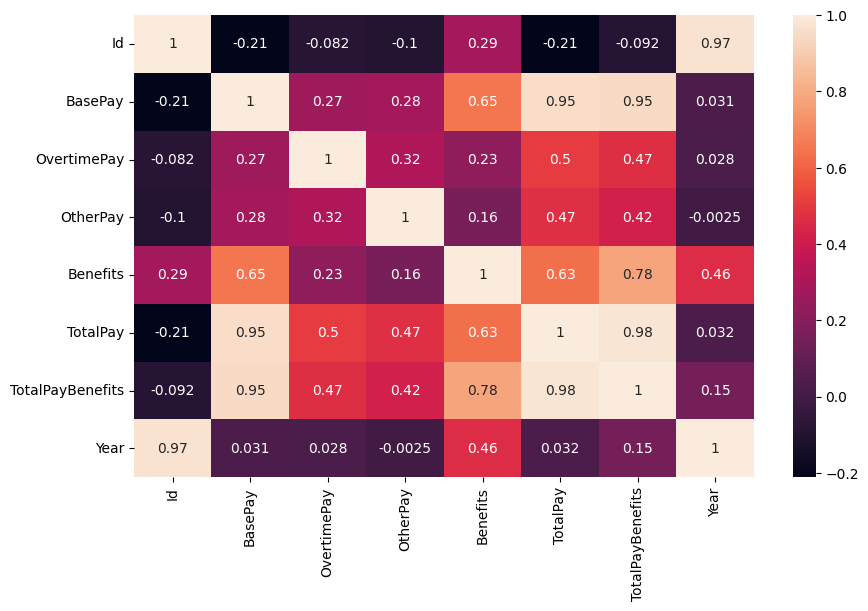

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

We can find a high correlation between Benefits and TotalPayBenefits which is predictable since TotalPayBenefits increases as Benefits increases.
We can find a very high correlation between TotalPay and TotalPayBenefits since it's TotalPay + Benefits and so on for all pays in our dataset.

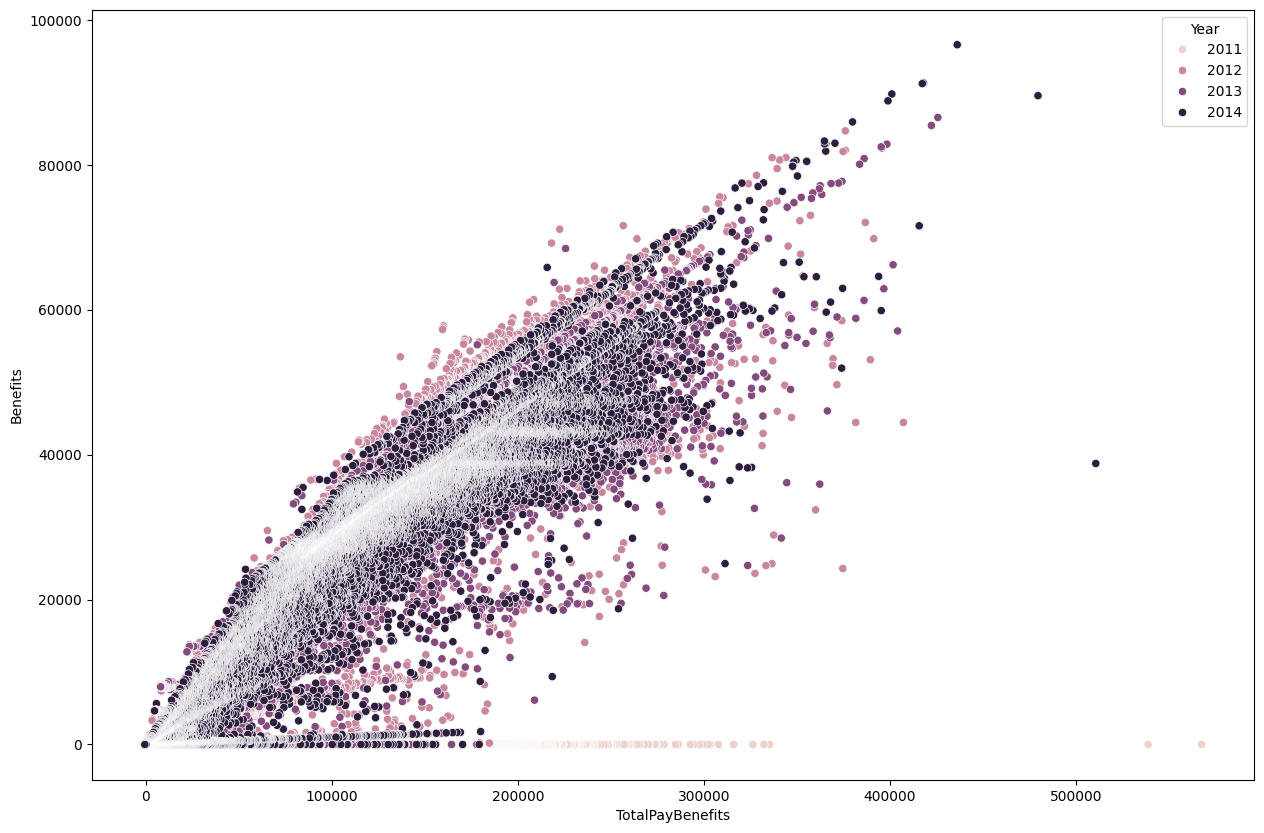

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(data= df, x= 'TotalPayBenefits', y='Benefits', hue= 'Year')
plt.show()

We notice that in almost all of 2011 (if not all) there were no Benefits added to TotalPay.

# Summary
- Dataset consists of 148654 rows and 13 columns
- Checked all data types presented in the Dataset.
- It had 2 Null valued columns so I dropped them. (can be kept in other context and factors depending on what the analysis is for)
- Filled Benefits null values with zero since TotalPay and TotalPayBenefits was exactly the same whenever benefits were null or zero.
- Notice that OvertimePay and OtherPay are null in 4 unprovided data rows. Those can be dropped since it does not impact the dataset.
- Notice that BasePay is TotalPay - (OvertimePay + OtherPay). Those null rows can be filled with this simple calculation.
- After filling all null values I performed some statistical operations on (BasePay, TotalPay, TotalPayBenefits)
- Found some Negative valued Salaries, we can round them up to zero or leave it as is. Depending on context and factors of the analysis.
- Found some zero valued salaries, we can remove them or leave it as is. Depending on the context and factors of the analysis.
- Visualized the distribution of (BasePay, TotalPay, TotalPayBenefits).
- Extracted some Departments from JobTitle, but alot of titles didn't include Department Name neither a patern to act on.
- Made a pie chart of Department portions.
- Made 3 groupings (BasePay, TotalPay, TotalPayBenefits) with year.
- Made statistical operations on each group.
- Put the calculated values in a single DataFrame for easier visualization and exploration.
- Made a heatmap (containing only numeric values of the DataFrame ofcourse) to visualize the correlation between features.
- Found a high correlation between TotalPayBenefits and Benefits. High correlation between all kinds of Pay.
- Made a scatter plot to visualize the correlation between Benefits and TotalPayBenefits.
- We notice that in almost all of 2011 (if not all) there were no Benefits added to TotalPay.

In [32]:
print('hello')

hello


# Good Luck!